<H3>    First Name: Balkattu Shreekantha Uttam
<H3>    Last Name: Kannantha
<H3>    USC ID: 9202391620
<H3>    Github UserName: Uttamkannantha

In [249]:
import pandas as pd
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import KFold, cross_val_score
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import _tree



<H3>1. Decision Trees as Interpretable Models

<h4>(a) Download the Accute Inflamations data from https://archive.ics.uci.edu/ ml/datasets/Acute+Inflammations.

In [250]:
columnList=['Temperature_of_patient','Occurrence_of_nausea','Lumbar_pain','Urine_pushing','Micturition_pains', 'Burning_of_urethra', 'Inflammation_of_urinary_bladder' ,'Nephritis_of_renal_pelvis_origin'] 
df = pd.read_csv("../data/diagnosis.data", sep="\\t", names=columnList, encoding="utf-16", lineterminator="\r")
df['Temperature_of_patient'] = df['Temperature_of_patient'].str.replace(',','.')
df



Temperature_of_patient Occurrence_of_nausea Lumbar_pain Urine_pushing  \
0                     35.5                   no         yes            no   
1                     35.9                   no          no           yes   
2                     35.9                   no         yes            no   
3                     36.0                   no          no           yes   
4                     36.0                   no         yes            no   
..                     ...                  ...         ...           ...   
115                   41.4                   no         yes           yes   
116                   41.5                   no          no            no   
117                   41.5                  yes         yes            no   
118                   41.5                   no         yes           yes   
119                   41.5                   no         yes           yes   

    Micturition_pains Burning_of_urethra Inflammation_of_urinary_bladder  \
0                  no                 no                              no   
1                 yes                yes                             yes   
2                  no                 no                              no   
3                 yes                yes                             yes   
4                  no                 no                              no   
..                ...                ...                             ...   
115                no                yes                              no   
116                no                 no                              no   
117               yes                 no                              no   
118                no                yes                              no   
119                no                yes                              no   

    Nephritis_of_renal_pelvis_origin  
0                                 no  
1                                 no  
2                                 no  
3                                 no  
4                                 no  
..                               ...  
115                              yes  
116                               no  
117                              yes  
118                              yes  
119                              yes  

[120 rows x 8 columns]

<h4>(b) Build a decision tree on the whole data set and plot it.1


In [251]:
for column in df.columns[1:]:
    df[column] = df[column].map({'yes': 1, 'no': 0})
df

Temperature_of_patient  Occurrence_of_nausea  Lumbar_pain  Urine_pushing  \
0                     35.5                     0            1              0   
1                     35.9                     0            0              1   
2                     35.9                     0            1              0   
3                     36.0                     0            0              1   
4                     36.0                     0            1              0   
..                     ...                   ...          ...            ...   
115                   41.4                     0            1              1   
116                   41.5                     0            0              0   
117                   41.5                     1            1              0   
118                   41.5                     0            1              1   
119                   41.5                     0            1              1   

     Micturition_pains  Burning_of_urethra  Inflammation_of_urinary_bladder  \
0                    0                   0                                0   
1                    1                   1                                1   
2                    0                   0                                0   
3                    1                   1                                1   
4                    0                   0                                0   
..                 ...                 ...                              ...   
115                  0                   1                                0   
116                  0                   0                                0   
117                  1                   0                                0   
118                  0                   1                                0   
119                  0                   1                                0   

     Nephritis_of_renal_pelvis_origin  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  
..                                ...  
115                                 1  
116                                 0  
117                                 1  
118                                 1  
119                                 1  

[120 rows x 8 columns]

In [252]:
X=df.iloc[:,:6]
Y=df.iloc[:,6:]

dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X, Y)

DecisionTreeClassifier(random_state=0)

In [253]:
dotfile = open("dt.dot", 'w')
tree.export_graphviz(dt, out_file=dotfile, feature_names=X.columns)
dotfile.close()

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(dt, filled = True, fontsize=15)
plt.show()


<h4>(c) Convert the decision rules into a set of IF-THEN rules.2

In [254]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print ("def tree({}):".format(", ".join(feature_names)))
    def recurse(node, depth):
        indent=" "*depth
        if (tree_.feature[node] != _tree.TREE_UNDEFINED):
                name = feature_name[node]
                threshold = tree_.threshold[node]
                print ("{}if {} <= {}:".format(indent, name, threshold))
                recurse(tree_.children_left[node], depth + 1)
                print ("{}else:  # if {} > {}".format(indent, name, threshold))
                recurse(tree_.children_right[node], depth + 1)
        else:
                print ("{}return {}".format(indent, tree_.value[node]))
    recurse(0, 1)

In [255]:
tree_to_code(dt, list(X.columns))

def tree(Temperature_of_patient, Occurrence_of_nausea, Lumbar_pain, Urine_pushing, Micturition_pains, Burning_of_urethra):
 if Temperature_of_patient <= 37.95000076293945:
  if Urine_pushing <= 0.5:
   return [[20.  0.]
 [20.  0.]]
  else:  # if Urine_pushing > 0.5
   return [[ 0. 40.]
 [40.  0.]]
 else:  # if Temperature_of_patient > 37.95000076293945
  if Lumbar_pain <= 0.5:
   return [[10.  0.]
 [10.  0.]]
  else:  # if Lumbar_pain > 0.5
   if Micturition_pains <= 0.5:
    return [[21.  0.]
 [ 0. 21.]]
   else:  # if Micturition_pains > 0.5
    if Urine_pushing <= 0.5:
     return [[10.  0.]
 [ 0. 10.]]
    else:  # if Urine_pushing > 0.5
     return [[ 0. 19.]
 [ 0. 19.]]


<h4>(d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.


In [256]:
#Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability
path = dt.cost_complexity_pruning_path(X, Y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [257]:
#plot a graph of effective alphas vs total impurities of leaves
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

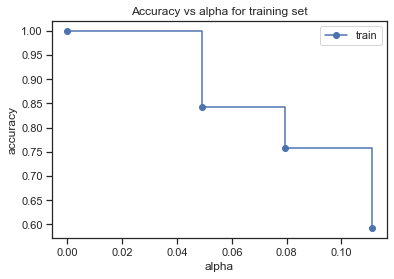

In [258]:
ccp_alphas = ccp_alphas[:-1]
classifiers = []
for ccp_alpha in ccp_alphas:
    dt = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(X, Y)
    classifiers.append(dt)

train_scores = [dt.score(X, Y) for dt in classifiers]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training set")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.legend()
plt.show()



In [259]:
#plot the graph of number of nodes vs alpha
node_counts = [dt.tree_.node_count for dt in classifiers]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("number of nodes")
ax.set_title("Number of nodes vs alpha")

ax.plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
plt.show()

In [260]:
#plot the graph of depth vs alpha
depth = [dt.tree_.max_depth for dt in classifiers]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("depth of tree")
ax.set_title("Depth vs alpha")

ax.plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
plt.show()

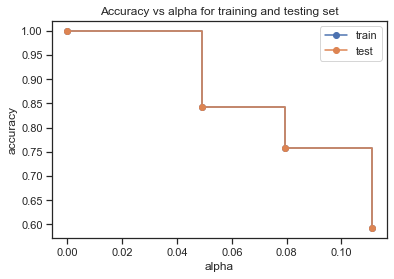

In [261]:
#Graph of accuracy vs alpha for training and testing set
train_scores = [dt.score(X, Y) for dt in classifiers]
test_scores = [dt.score(X, Y) for dt in classifiers]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing set")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

<H3> 2. The LASSO and Boosting for Regression

<h4> (a) Download the Communities and Crime data3 from https://archive.ics.uci. edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.


In [262]:
#Read the file located at "../data/communities.names" and store it as column names
columnList = []
with open("../data/communities.names", "r") as f:
    for line in f:
        if line.startswith("@attribute"):
            columnList.append(line.split()[1])

print("Length of columnList: ", len(columnList))

#Read the file located at "../data/communities.data" and store it as a dataframe
df = pd.read_csv("../data/communities.data", sep=",", names=columnList, encoding="utf-8",na_values='?')
df

Length of columnList:  128


state  county  community        communityname  fold  population  \
0         8     NaN        NaN         Lakewoodcity     1        0.19   
1        53     NaN        NaN          Tukwilacity     1        0.00   
2        24     NaN        NaN         Aberdeentown     1        0.00   
3        34     5.0    81440.0  Willingborotownship     1        0.04   
4        42    95.0     6096.0    Bethlehemtownship     1        0.01   
...     ...     ...        ...                  ...   ...         ...   
1989     12     NaN        NaN    TempleTerracecity    10        0.01   
1990      6     NaN        NaN          Seasidecity    10        0.05   
1991      9     9.0    80070.0        Waterburytown    10        0.16   
1992     25    17.0    72600.0          Walthamcity    10        0.08   
1993      6     NaN        NaN          Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                 0.90   
1        0.12            0.45        NaN            NaN                  NaN   
2        0.21            0.02        NaN            NaN                  NaN   
3        0.39            0.28        NaN            NaN                  NaN   
4        0.09            0.02        NaN            NaN                  NaN   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05        NaN            NaN                  NaN   
1990     0.37            0.20        NaN            NaN                  NaN   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                     NaN                 0.00              NaN   
2                     NaN                 0.00              NaN   
3                     NaN                 0.00              NaN   
4                     NaN                 0.00              NaN   
...                   ...                  ...              ...   
1989                  NaN                 0.00              NaN   
1990                  NaN                 0.00              NaN   
1991                  0.0                 0.91             0.28   
1992                  0.0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[1994 rows x 128 columns]

In [263]:
#Create test and train data frame, 1495 rows for training and rest rows for testing while ignoring the first 5 columns 
train_df = df.iloc[:1495,5:]
test_df = df.iloc[1495:,5:]

print("Length of train_df: ", len(train_df))
print("Length of test_df: ", len(test_df))


Length of train_df:  1495
Length of test_df:  499


<h4>(b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [264]:
#Use a data imputation technique to deal with the missing values in the test and train data set
train_df = train_df.fillna(train_df.mean())
test_df = test_df.fillna(test_df.mean())


In [265]:
train_df

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1490        0.00           0.59          0.01          0.69          1.00   
1491        0.16           0.62          0.03          0.74          0.48   
1492        0.01           0.36          0.95          0.24          0.03   
1493        0.06           0.53          0.01          0.98          0.05   
1494        0.05           0.43          0.08          0.65          0.12   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1490         0.07         0.41         0.28         0.23        0.57  ...   
1491         0.42         0.44         0.57         0.40        0.25  ...   
1492         0.01         0.44         0.42         0.27        0.63  ...   
1493         0.01         0.40         0.40         0.24        0.29  ...   
1494         1.00         0.37         0.52         0.33        0.44  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20   0.060000       0.040000   
1         0.02     0.12            0.45   0.163975       0.080502   
2         0.01     0.21            0.02   0.163975       0.080502   
3         0.02     0.39            0.28   0.163975       0.080502   
4         0.04     0.09            0.02   0.163975       0.080502   
...        ...      ...             ...        ...            ...   
1490      0.02     0.14            0.22   0.163975       0.080502   
1491      0.07     0.40            0.14   0.070000       0.050000   
1492      0.03     0.12            0.01   0.163975       0.080502   
1493      0.08     0.15            0.02   0.163975       0.080502   
1494      0.00     1.00            1.00   0.000000       0.010000   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                0.900000             0.500000                 0.32   
1                0.713054             0.451883                 0.00   
2                0.713054             0.451883                 0.00   
3                0.713054             0.451883                 0.00   
4                0.713054             0.451883                 0.00   
...                   ...                  ...                  ...   
1490             0.713054             0.451883                 0.00   
1491             0.850000             0.500000                 0.61   
1492             0.713054             0.451883                 0.00   
1493             0.713054             0.451883                 0.00   
1494             0.770000             0.000000                 0.51   

      PolicBudgPerPop  ViolentCrimesPerPop  
0            0.140000                 0.20  
1            0.190753                 0.67  
2            0.190753                 0.43  
3            0.190753                 0.12  
4            0.190753                 0.03  
...               ...                  ...  
1490         0.190753                 0.03  
1491         0.190000                 0.20  
1492         0.190753                 0.30  
1493         0.190753   

<h4>(c) Plot a correlation matrix for the features in the data set.

In [266]:
#combining train and test (df with missing value calculated)
df = pd.concat([train_df,test_df],ignore_index=True)
df

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1989         0.16         0.43         0.51         0.35        0.30  ...   
1990         0.32         0.69         0.86         0.73        0.14  ...   
1991         0.25         0.35         0.50         0.31        0.54  ...   
1992         0.10         0.58         0.74         0.63        0.41  ...   
1993         0.77         0.50         0.62         0.40        0.17  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20   0.060000       0.040000   
1         0.02     0.12            0.45   0.163975       0.080502   
2         0.01     0.21            0.02   0.163975       0.080502   
3         0.02     0.39            0.28   0.163975       0.080502   
4         0.04     0.09            0.02   0.163975       0.080502   
...        ...      ...             ...        ...            ...   
1989      0.01     0.28            0.05   0.160500       0.065375   
1990      0.02     0.37            0.20   0.160500       0.065375   
1991      0.08     0.32            0.18   0.080000       0.060000   
1992      0.03     0.38            0.33   0.020000       0.020000   
1993      0.11     0.30            0.05   0.080000       0.040000   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                0.900000             0.500000                 0.32   
1                0.713054             0.451883                 0.00   
2                0.713054             0.451883                 0.00   
3                0.713054             0.451883                 0.00   
4                0.713054             0.451883                 0.00   
...                   ...                  ...                  ...   
1989             0.655375             0.406250                 0.00   
1990             0.655375             0.406250                 0.00   
1991             0.780000             0.000000                 0.91   
1992             0.790000             0.000000                 0.22   
1993             0.730000             0.500000                 1.00   

      PolicBudgPerPop  ViolentCrimesPerPop  
0            0.140000                 0.20  
1            0.190753                 0.67  
2            0.190753                 0.43  
3            0.190753                 0.12  
4            0.190753                 0.03  
...               ...                  ...  
1989         0.208000                 0.09  
1990         0.208000                 0.45  
1991         0.280000                 0.23  
1992         0.180000   

In [267]:
#Plot the co reation matrix for the data set after dropping the first 5 columns


corr = df.iloc[:,5:].corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()
corr

racePctHisp  agePct12t21  agePct12t29  agePct16t24  \
racePctHisp             1.000000     0.145741     0.205870     0.086343   
agePct12t21             0.145741     1.000000     0.822424     0.894547   
agePct12t29             0.205870     0.822424     1.000000     0.933720   
agePct16t24             0.086343     0.894547     0.933720     1.000000   
agePct65up             -0.227694    -0.410958    -0.520637    -0.323092   
...                          ...          ...          ...          ...   
LemasPctPolicOnPatr     0.024973    -0.003476     0.009213     0.012742   
LemasGangUnitDeploy     0.026412     0.009440     0.003542    -0.001200   
LemasPctOfficDrugUn     0.125353     0.001301     0.117290     0.083180   
PolicBudgPerPop         0.001647    -0.074535    -0.066743    -0.049417   
ViolentCrimesPerPop     0.293050     0.060477     0.153357     0.099347   

                     agePct65up  numbUrban  pctUrban  medIncome  pctWWage  \
racePctHisp           -0.227694   0.153941  0.038298  -0.140471  0.019629   
agePct12t21           -0.410958  -0.021367 -0.239994  -0.296723  0.119776   
agePct12t29           -0.520637   0.112614 -0.089884  -0.342740  0.259699   
agePct16t24           -0.323092   0.054579 -0.138893  -0.326803  0.103368   
agePct65up             1.000000  -0.106075 -0.111337  -0.290086 -0.838662   
...                         ...        ...       ...        ...       ...   
LemasPctPolicOnPatr    0.019504  -0.057517  0.002224   0.018786  0.011225   
LemasGangUnitDeploy   -0.036443   0.072406 -0.005536  -0.013307  0.014790   
LemasPctOfficDrugUn   -0.010168   0.478179  0.258955  -0.126211 -0.064602   
PolicBudgPerPop        0.070538  -0.035598 -0.021536   0.028333 -0.056281   
ViolentCrimesPerPop    0.067171   0.362897  0.082025  -0.424221 -0.305500   

                     pctWFarmSelf  ...  LandArea   PopDens  PctUsePubTrans  \
racePctHisp              0.082855  ...  0.011634  0.370103        0.078366   
agePct12t21              0.265498  ...  0.025736 -0.095749       -0.173279   
agePct12t29              0.124626  ...  0.062476  0.119725       -0.023507   
agePct16t24              0.144876  ...  0.031632  0.045979       -0.040419   
agePct65up              -0.158639  ... -0.124245  0.015434        0.006786   
...                           ...  ...       ...       ...             ...   
LemasPctPolicOnPatr      0.007785  ... -0.071618  0.053388        0.026682   
LemasGangUnitDeploy      0.032216  ...  0.106469 -0.076351       -0.080706   
LemasPctOfficDrugUn     -0.158810  ...  0.299632  0.228084        0.206644   
PolicBudgPerPop         -0.009814  ... -0.110060  0.067016        0.077984   
ViolentCrimesPerPop     -0.153124  ...  0.196800  0.281390        0.153829   

                     PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
racePctHisp           0.022098       0.060512             0.024973   
agePct12t21          -0.000128      -0.019269            -0.003476   
agePct12t29           0.015496       0.011067             0.009213   
agePct16t24           0.007762      -0.001448             0.012742   
agePct65up           -0.020846      -0.020628             0.019504   
...                        ...            ...                  ...   
LemasPctPolicOnPatr  -0.107241      -0.058583             1.000000   
LemasGangUnitDeploy   0.079727       0.034917             0.035644   
LemasPctOfficDrugUn  -0.052428      -0.062375             0.020296   
PolicBudgPerPop       0.242517       0.245440            -0.254718   
ViolentCrimesPerPop   0.181222       0.161822            -0.031598   

                     LemasGangUnitDeploy  LemasPctOfficDrugUn  \
racePctHisp                     0.026412             0.125353   
agePct12t21                     0.009440             0.001301   
agePct12t29                     0.003542             0.117290   
agePct16t24                    -0.001200             0.083180   
agePct65up                     -0.036443            -0.010168   
...                        

<h4>(d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m , in
which s is sample standard deviation and m is sample mean..

In [268]:
#calcule coefficeient of variation cs for each column after dropping first 5 columns in df by calculating the standard deviation and mean of each column and put it in dataframe
cvDf = pd.DataFrame()
for col in df.iloc[:,5:].columns:
    cvDf.loc[col, 'CV'] = df[col].std() / df[col].mean()
cvDf

CV
racePctHisp          1.614278
agePct12t21          0.365840
agePct12t29          0.290693
agePct16t24          0.495161
agePct65up           0.423442
...                       ...
LemasPctPolicOnPatr  0.126642
LemasGangUnitDeploy  0.370311
LemasPctOfficDrugUn  2.555266
PolicBudgPerPop      0.339119
ViolentCrimesPerPop  0.979015

[118 rows x 1 columns]

<h4>2 (e) Pick sqrt(128) features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [269]:
#Pick sqrt of 128 features with highest CV and store it in a list
cvDf = cvDf.sort_values(by='CV', ascending=False)
cvDf = cvDf.iloc[:int(np.sqrt(128)),:]
cvDf


CV
NumStreet            4.407702
NumInShelters        3.485481
NumIlleg             2.994196
NumImmig             2.900497
LemasPctOfficDrugUn  2.555266
NumUnderPov          2.304970
numbUrban            2.001744
HousVacant           1.958780
LandArea             1.678031
racePctHisp          1.614278
PctNotSpeakEnglWell  1.459067

In [270]:
#consider the features with highest CV and create a new dataframe with those features along with ViolentCrimesPerPop column
newDf = df[cvDf.index.tolist() + ['ViolentCrimesPerPop']]
newDf


NumStreet  NumInShelters  NumIlleg  NumImmig  LemasPctOfficDrugUn  \
0          0.00           0.04      0.04      0.03                 0.32   
1          0.00           0.00      0.00      0.01                 0.00   
2          0.00           0.00      0.01      0.00                 0.00   
3          0.00           0.00      0.03      0.02                 0.00   
4          0.00           0.00      0.00      0.00                 0.00   
...         ...            ...       ...       ...                  ...   
1989       0.00           0.00      0.00      0.01                 0.00   
1990       0.00           0.01      0.03      0.05                 0.00   
1991       0.02           0.06      0.13      0.06                 0.91   
1992       0.01           0.04      0.02      0.06                 0.22   
1993       0.08           0.08      0.11      0.20                 1.00   

      NumUnderPov  numbUrban  HousVacant  LandArea  racePctHisp  \
0            0.08       0.20        0.21      0.12         0.17   
1            0.01       0.02        0.02      0.02         0.07   
2            0.01       0.00        0.01      0.01         0.04   
3            0.01       0.06        0.01      0.02         0.10   
4            0.00       0.02        0.01      0.04         0.05   
...           ...        ...         ...       ...          ...   
1989         0.01       0.03        0.02      0.01         0.16   
1990         0.04       0.06        0.03      0.02         0.32   
1991         0.12       0.17        0.21      0.08         0.25   
1992         0.03       0.09        0.05      0.03         0.10   
1993         0.16       0.21        0.12      0.11         0.77   

      PctNotSpeakEnglWell  ViolentCrimesPerPop  
0                    0.06                 0.20  
1                    0.10                 0.67  
2                    0.04                 0.43  
3                    0.08                 0.12  
4                    0.05                 0.03  
...                   ...                  ...  
1989                 0.09                 0.09  
1990                 0.36                 0.45  
1991                 0.28                 0.23  
1992                 0.20                 0.19  
1993                 0.77                 0.48  

[1994 rows x 12 columns]

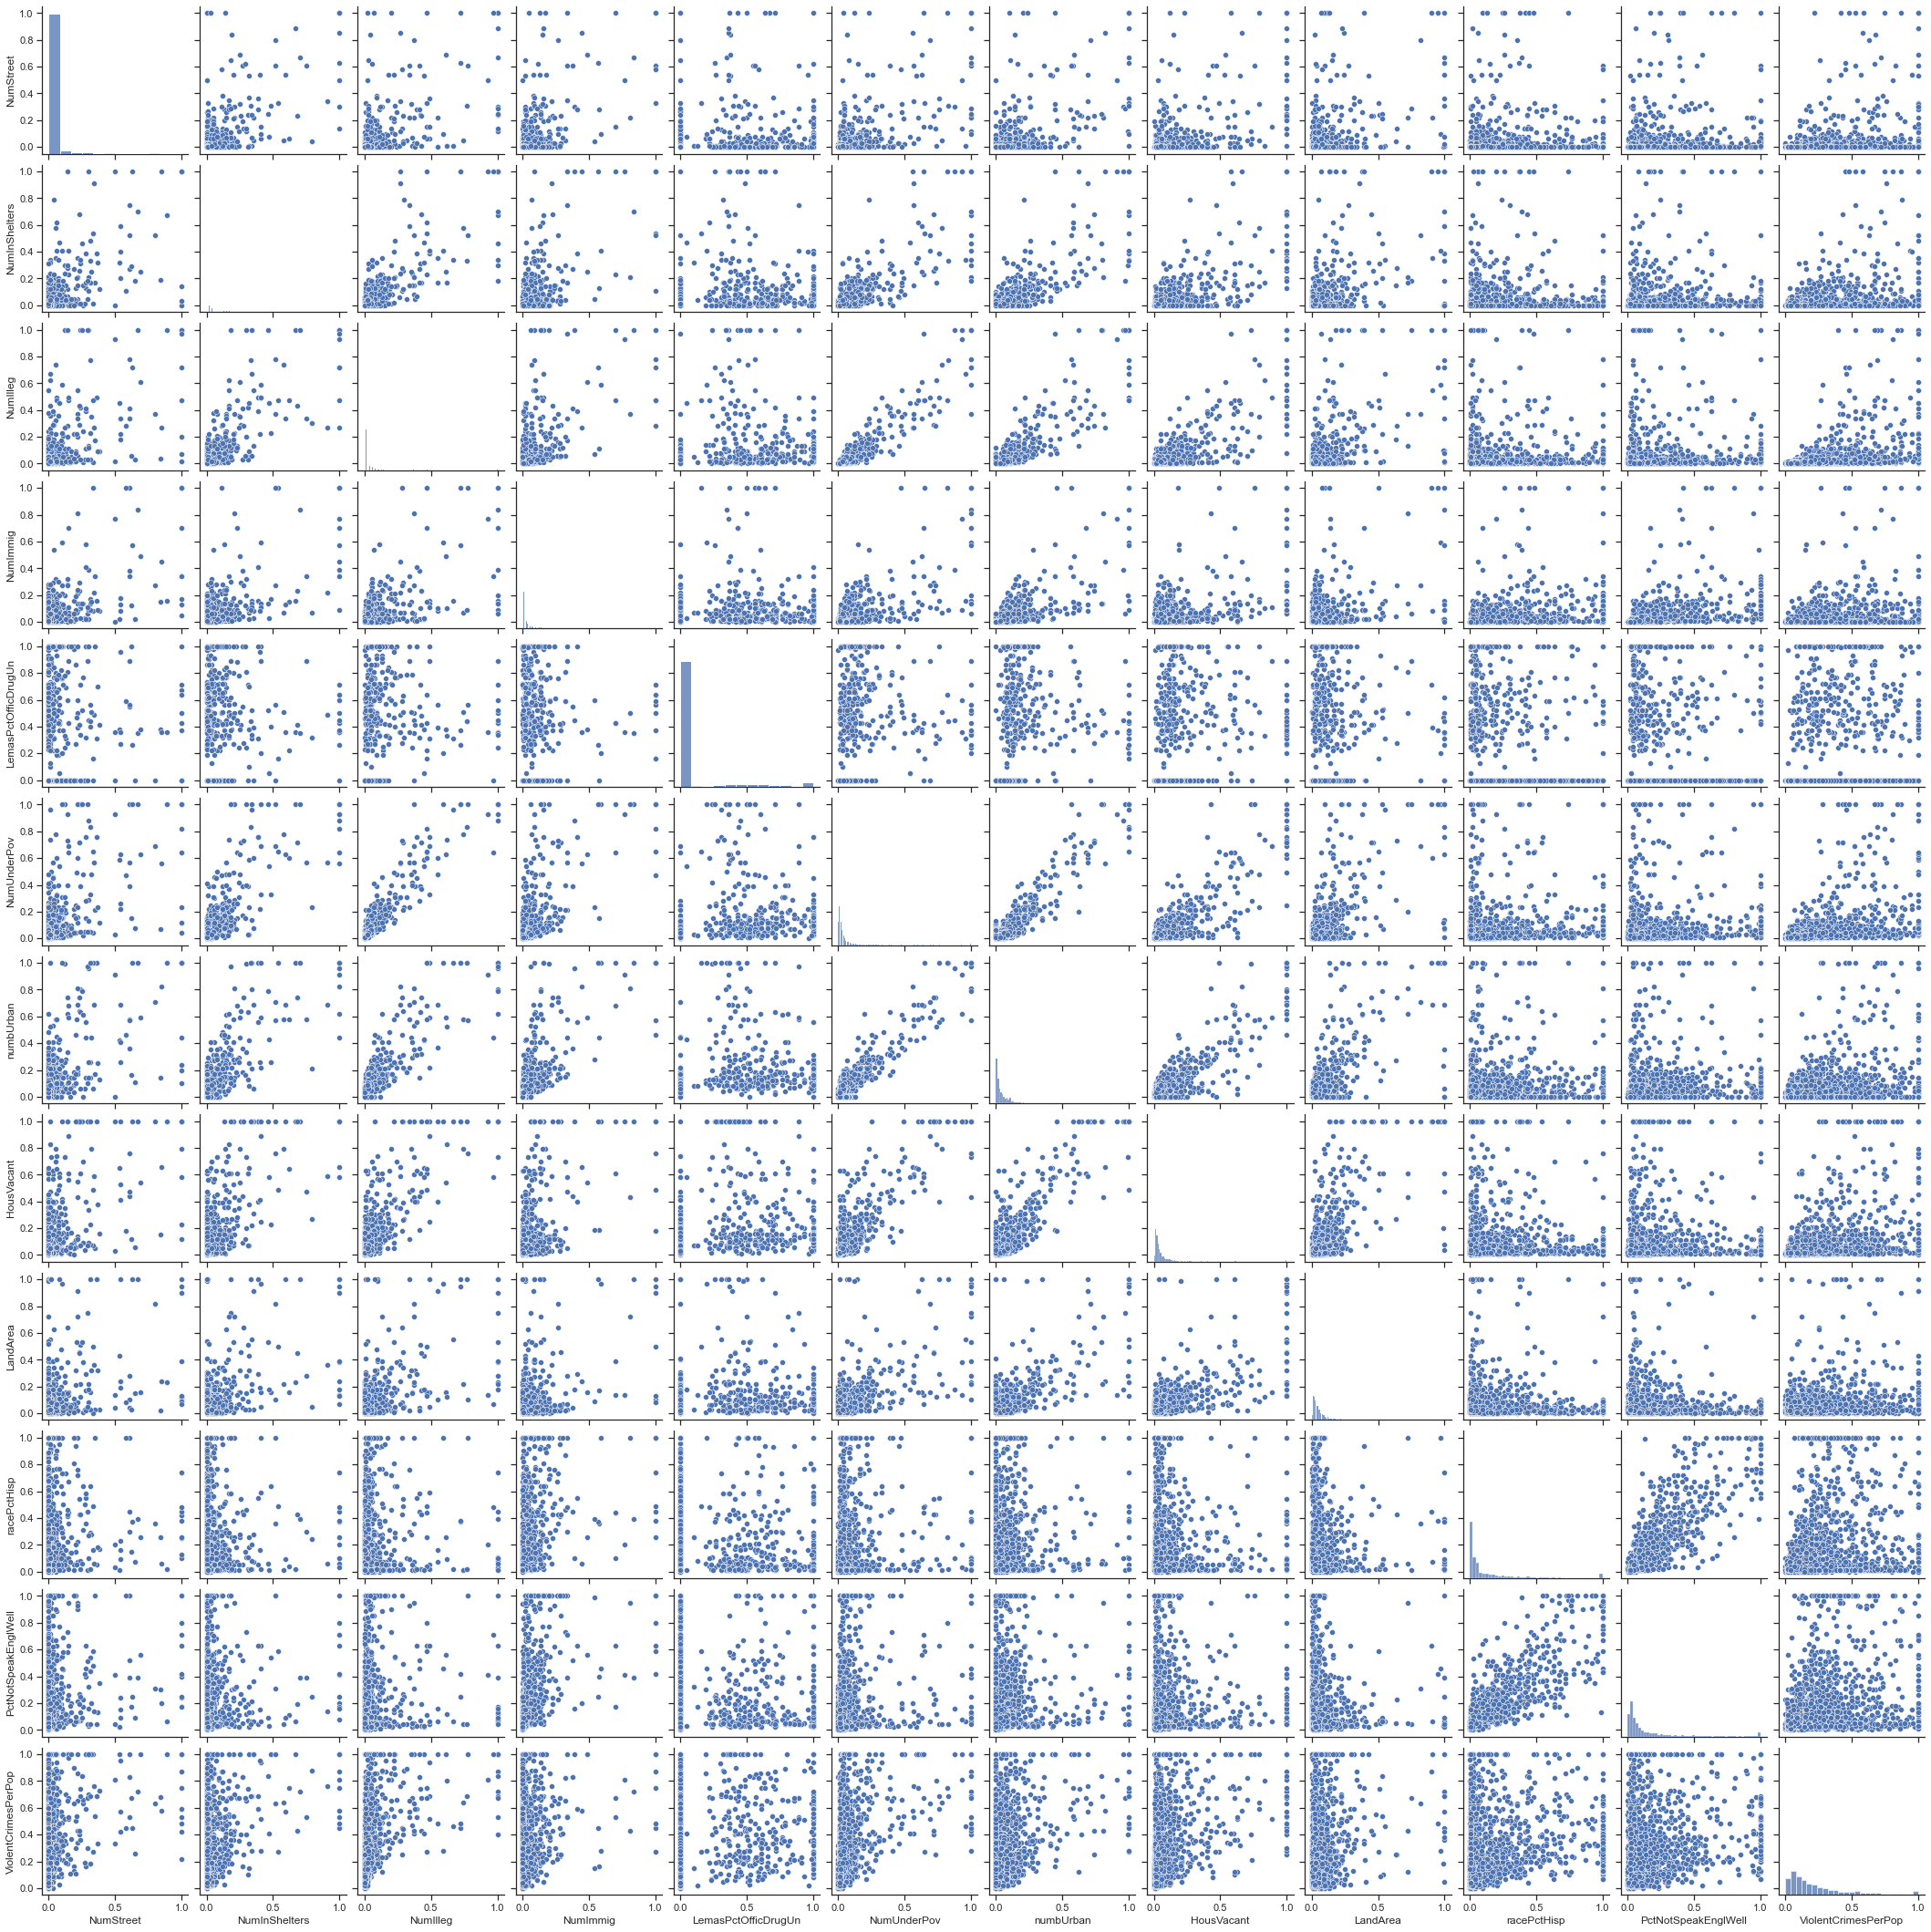

In [271]:
#plot the pairplot for the new dataframe with max size
sns.set(style="ticks", color_codes=True)
sns.pairplot(newDf, size=2.5)
plt.show()

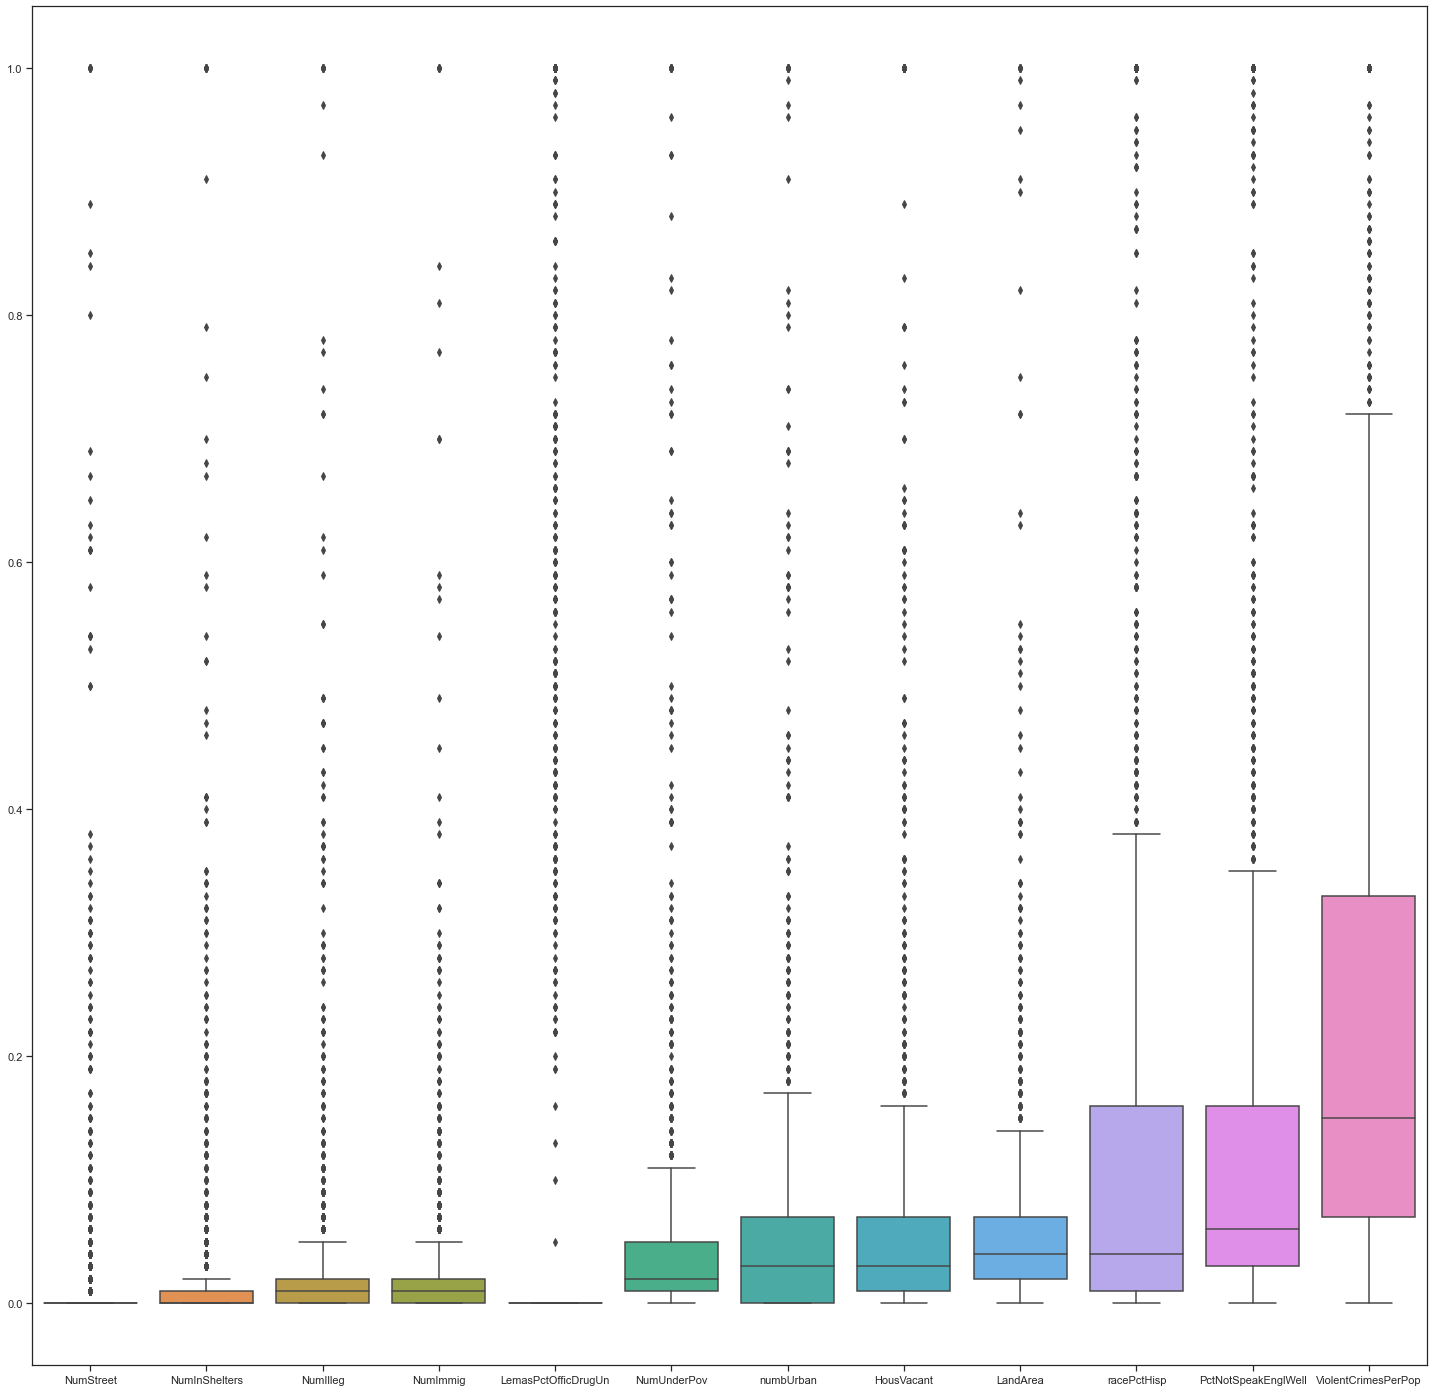

In [272]:

#plot the box plot for the new dataframe in the same plot with max size
fig, ax = plt.subplots(figsize=(25,25))
sns.boxplot(data=newDf)
plt.show()

Most data points are spread out, it is tough to map a relation but few features show relation to significant level
1. Numlleg has a relaton with NumUnderPov, population and numbUrban<br>
2. Population with numbUrban has strong linear relation<br>
3. NumUnderPov has connection with population and numburban<br>
4. Housevacant has weak corelation with population, numbUrban and NumUnderPov<br>

<h4> (f) Fit a linear model using least squares to the training set and report the test error.

In [273]:
#Fit the linear model using least squares method on training calculate test and train error
X_train = train_df.drop('ViolentCrimesPerPop', axis=1)
Y_train = train_df['ViolentCrimesPerPop']

X_test = test_df.drop('ViolentCrimesPerPop', axis=1)
Y_test = test_df['ViolentCrimesPerPop']

# X_train = sm.add_constant(X_train)
# X_test = sm.add_constant(X_test)

model = sm.OLS(Y_train, X_train).fit()
predictions = model.predict(X_test)

In [274]:
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                 
Dep. Variable:     ViolentCrimesPerPop   R-squared (uncentered):                   0.857
Model:                             OLS   Adj. R-squared (uncentered):              0.845
Method:                  Least Squares   F-statistic:                              68.25
Date:                 Fri, 28 Oct 2022   Prob (F-statistic):                        0.00
Time:                         20:22:45   Log-Likelihood:                          955.27
No. Observations:                 1495   AIC:                                     -1669.
Df Residuals:                     1374   BIC:                                     -1026.
Df Model:                          121                                                  
Covariance Type:             nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [275]:
#calculate the test and train error
train_error = np.mean((model.predict(X_train) - Y_train) ** 2)
test_error = np.mean((predictions - Y_test) ** 2)

print("Train error: ", train_error)
print("Test error: ", test_error)

Train error:  0.016312486485251756
Test error:  0.018190375606002365


<h4>(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [276]:
 #Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.
alphas = np.logspace(-10, 1, 400)
ridgecv = RidgeCV(alphas=alphas, cv = KFold(n_splits = 5, shuffle = True))
ridgecv.fit(X_train, Y_train)
ridgecv.alpha_

3.858923467029899

In [277]:
#calculate the test and train error
train_error = np.mean((ridgecv.predict(X_train) - Y_train) ** 2)
test_error = np.mean((ridgecv.predict(X_test) - Y_test) ** 2)

print("Train error: ", train_error)
print("Test error: ", test_error)

Train error:  0.017234696628941764
Test error:  0.017526994585805835


Test error reduced or model improved when compared to linear model

<h4> (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized 2 features. Report the test error for both cases and compare them

In [278]:
#Fit a lasso model on the training set, with λ chosen by cross-validation. Report the test error obtained.
lassocv = LassoCV(alphas=alphas, cv = KFold(n_splits = 5, shuffle = True))
lassocv.fit(X_train, Y_train)
lassocv.alpha_

0.0002057231701189553

In [279]:
#Features selected by lasso
lasso_features = X_train.columns[lassocv.coef_ != 0]
lasso_features

Index(['racepctblack', 'racePctAsian', 'agePct12t29', 'pctUrban', 'pctWWage',
       'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire',
       'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap',
       'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctEmploy',
       'PctEmplManu', 'MalePctDivorce', 'MalePctNevMarr', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'PctIlleg', 'NumImmig',
       'PctImmigRec5', 'PctRecImmig10', 'PctNotSpeakEnglWell',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant',
       'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
       'PctHousNoPhone', 'PctWOFullPlumb', 'RentLowQ', 'MedRent',
       'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters',
       'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameCity85',
       'LemasSwFTFieldPerPop', 'LemasTotReqPerPop', 'PolicReqPerOffic',
       'PctPolicBlack', 'NumKindsDrugsSeiz', 'Polic

In [280]:
#Calculate the test and train error
train_error = np.mean((lassocv.predict(X_train) - Y_train) ** 2)
test_error = np.mean((lassocv.predict(X_test) - Y_test) ** 2)

print("Train error: ", train_error)
print("Test error: ", test_error)

Train error:  0.01751451031022507
Test error:  0.017569272738254104


Repeating the Lasso with standardized feature

In [281]:
#Repeat the above steps with standardized features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [282]:
#Fit lasso model for standardized features
lassocv = LassoCV(alphas=alphas, cv = KFold(n_splits = 5, shuffle = True))
lassocv.fit(X_train_scaled, Y_train)
lassocv.alpha_


0.0006872151605431107

In [283]:
lasso_features_standardized = X_train.columns[lassocv.coef_ != 0]
lasso_features_standardized

Index(['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29',
       'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu',
       'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom',
       'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10',
       'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR',
       'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos',
       'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'RentLowQ',
       'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
       'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignB

In [284]:
#Calculate the test and train error
train_error = np.mean((lassocv.predict(X_train_scaled) - Y_train) ** 2)
test_error = np.mean((lassocv.predict(X_test_scaled) - Y_test) ** 2)

print("Train error: ", train_error)
print("Test error: ", test_error)

Train error:  0.0169700302830951
Test error:  0.01783299846739124


There is almost no change(negligible if rounded to 2decimal places) in error % in both the cases

<h4>(i) Fit a PCR model on the training set, with M (the number of principal compo- nents) chosen by cross-validation. Report the test error obtained.

In [285]:
std = StandardScaler()

X_train_standardized = std.fit_transform(X_train)
X_test_standardized = std.transform(X_test)

linear_regression = LinearRegression()
minimum_m= -1 #lowest number
error=101 #max number

for m in range(1, X_train.shape[1]+1):
    x_train_pca = PCA(n_components=m).fit_transform(X_train_standardized)
    currentError= -1*(cross_val_score(linear_regression, x_train_pca, Y_train, cv=5,scoring='neg_mean_squared_error').mean())
    if(currentError<error):
        error=currentError
        minimum_m=m
    
print("Minimun training error is: ",error)
print("Value of M at minimun error",minimum_m)


Minimun training error is:  0.019450868592835905
Value of M at minimun error 95


In [286]:
#fit PCA model on training data on above chosen m
pca = PCA(n_components=minimum_m)
pca.fit(X_train_standardized)

#fit it on linear regression model

linear_regression = LinearRegression()
linear_regression.fit(pca.transform(X_train_standardized), Y_train)

#calculate the test and train error
train_error = np.mean((linear_regression.predict(pca.transform(X_train_standardized)) - Y_train) ** 2)
test_error = np.mean((linear_regression.predict(pca.transform(X_test_standardized)) - Y_test) ** 2)

In [287]:
print("Train error: ", train_error)
print("Test error: ", test_error)

Train error:  0.01665363735826
Test error:  0.018338504029999644


Error is slightly better when compared to above models

<h4> (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L 1 -penalized regression at each node. Such a tree is called L 1 penalized gradient boosting tree. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation.

In [288]:
xgbModel = xgb.XGBRegressor(learning_rate = 0.1, max_depth=5, n_estimators=100,
                          objective="reg:squarederror", eval_metric='rmse', n_jobs=-1)

parameters = {'alpha': [1e-8,1e-7,1e-6,1e-5,1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9]}

model_fit = GridSearchCV(estimator= xgbModel, param_grid=parameters, cv=5)
model_fit.fit(X_train, Y_train)
alpha = model_fit.best_params_['alpha']
print("Best alpha value", alpha)
    

Best alpha value 1.0


In [289]:
model = xgb.XGBRegressor(alpha= alpha,learning_rate = 0.1, max_depth=5, n_estimators=1000,
                         objective="reg:squarederror",eval_metric='rmse',n_jobs=-1).fit(X_train, Y_train)


In [290]:
 #Calculate the test and train error
train_error = np.mean((model.predict(X_train) - Y_train) ** 2)
test_error = np.mean((model.predict(X_test) - Y_test) ** 2)

print("Train error: ", train_error)
print("Test error: ", test_error)

Train error:  0.00232578078792596
Test error:  0.01650217119253646


This model has best train error so far among all models and is the test error